In [48]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import functions as F
from afinn import Afinn
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

af = Afinn()
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cristinalawson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# create Spark session
spark = SparkSession.builder.appName("TwitterSentimentAnalysis").getOrCreate()

In [3]:
def preprocess(df):
    df = df.drop("_c0")
    df = df.drop("_c3")
    df = df.drop("_c4")
    df = df.drop("_c5")
    df = df.drop("_c6")
    df = df.drop("_c7")
    df = df.withColumnRenamed("_c1", "text")
    df = df.withColumnRenamed("_c2", "geo")
    df = df.withColumnRenamed("_c8", "brand")
    df = df.filter(df.text != "text")

    return df

# text classification
def polarity_detection(list):
    total = 0

    polarity_scores = [sid.polarity_scores(text) for text in list]

    return polarity_scores

def polarity_detection_avg(list):
    total = 0

    polarity_scores = [sid.polarity_scores(text) for text in list]

    for val in polarity_scores:
        total += val
    avg = val/len(polarity_scores)

    return avg

def sentiment_detection(list):
    sentiment_scores = [af.score(text) for text in list]

    return sentiment_scores

def sentiment_detection_avg(list):
    total = 0

    sentiment_scores = [af.score(text) for text in list]

    for val in sentiment_scores:
        total += val
    avg = val/len(sentiment_scores)

    return avg

In [75]:
if __name__ == "__main__":

    # read the tweet data from socket
    adidas_df = spark.read.csv("Data/Preprocessed Tweets/adidas_p.csv", multiLine=True)
    asos_df = spark.read.csv("Data/Preprocessed Tweets/asos_p.csv", multiLine=True)
    boohoo_df = spark.read.csv("Data/Preprocessed Tweets/boohoo_p.csv", multiLine=True)
    chanel_df = spark.read.csv("Data/Preprocessed Tweets/chanel_p.csv", multiLine=True)
    gucci_df = spark.read.csv("Data/Preprocessed Tweets/gucci_p.csv", multiLine=True)
    hm_df = spark.read.csv("Data/Preprocessed Tweets/h&m_p.csv", multiLine=True)
    nike_df = spark.read.csv("Data/Preprocessed Tweets/nike_p.csv", multiLine=True)
    shein_df = spark.read.csv("Data/Preprocessed Tweets/shein_p.csv", multiLine=True)
    victoriassecret_df = spark.read.csv("Data/Preprocessed Tweets/victoriassecret_p.csv", multiLine=True)
    zara_df = spark.read.csv("Data/Preprocessed Tweets/zara_p.csv", multiLine=True)

    # Preprocess the data
    adidas_df = preprocess(adidas_df)
    asos_df = preprocess(asos_df)
    boohoo_df = preprocess(boohoo_df)
    chanel_df = preprocess(chanel_df)
    gucci_df = preprocess(gucci_df)
    hm_df = preprocess(hm_df)
    nike_df = preprocess(nike_df)
    shein_df = preprocess(shein_df)
    victoriassecret_df = preprocess(victoriassecret_df)
    zara_df = preprocess(zara_df)

    adidas_df.printSchema()
    adidas_df.show()

    # # text classification to define polarity and subjectivity
    # listValues = adidas_df.select("text").rdd.flatMap(lambda x: x).collect()
    # adidas_polarity = polarity_detection(listValues)
    # adidas_sentiment = sentiment_detection(listValues)
    # #adidas_polarity_avg = polarity_detection_avg(listValues)
    # adidas_sentiment_avg = sentiment_detection_avg(listValues)
    #
    # listValues = asos_df.select("text").rdd.flatMap(lambda x: x).collect()
    # asos_polarity = polarity_detection(listValues)
    # asos_sentiment = sentiment_detection(listValues)
    # #asos_polarity_avg = polarity_detection_avg(listValues)
    # asos_sentiment_avg = sentiment_detection_avg(listValues)
    #
    # listValues = boohoo_df.select("text").rdd.flatMap(lambda x: x).collect()
    # boohoo_polarity = polarity_detection(listValues)
    # boohoo_sentiment = sentiment_detection(listValues)
    # #boohoo_polarity_avg = polarity_detection_avg(listValues)
    # boohoo_sentiment_avg = sentiment_detection_avg(listValues)
    #
    # listValues = chanel_df.select("text").rdd.flatMap(lambda x: x).collect()
    # chanel_polarity = polarity_detection(listValues)
    # chanel_sentiment = sentiment_detection(listValues)
    # #chanel_polarity_avg = polarity_detection_avg(listValues)
    # chanel_sentiment_avg = sentiment_detection_avg(listValues)
    #
    # listValues = gucci_df.select("text").rdd.flatMap(lambda x: x).collect()
    # gucci_polarity = polarity_detection(listValues)
    # gucci_sentiment = sentiment_detection(listValues)
    # #gucci_polarity_avg = polarity_detection_avg(listValues)
    # gucci_sentiment_avg = sentiment_detection_avg(listValues)
    #
    # listValues = hm_df.select("text").rdd.flatMap(lambda x: x).collect()
    # hm_polarity = polarity_detection(listValues)
    # hm_sentiment = sentiment_detection(listValues)
    # #hm_polarity_avg = polarity_detection_avg(listValues)
    # hm_sentiment_avg = sentiment_detection_avg(listValues)
    #
    # listValues = nike_df.select("text").rdd.flatMap(lambda x: x).collect()
    # nike_polarity = polarity_detection(listValues)
    # nike_sentiment = sentiment_detection(listValues)
    # #nike_polarity_avg = polarity_detection_avg(listValues)
    # nike_sentiment_avg = sentiment_detection_avg(listValues)
    #
    # listValues = shein_df.select("text").rdd.flatMap(lambda x: x).collect()
    # shein_polarity = polarity_detection(listValues)
    # shein_sentiment = sentiment_detection(listValues)
    # #shein_polarity_avg = polarity_detection_avg(listValues)
    # shein_sentiment_avg = sentiment_detection_avg(listValues)
    #
    # listValues = victoriassecret_df.select("text").rdd.flatMap(lambda x: x).collect()
    # victoriassecret_polarity = polarity_detection(listValues)
    # victoriassecret_sentiment = sentiment_detection(listValues)
    # #victoriassecret_polarity_avg = polarity_detection_avg(listValues)
    # victoriassecret_sentiment_avg = sentiment_detection_avg(listValues)
    #
    # listValues = zara_df.select("text").rdd.flatMap(lambda x: x).collect()
    # zara_polarity = polarity_detection(listValues)
    # zara_sentiment = sentiment_detection(listValues)
    # #zara_polarity_avg = polarity_detection_avg(listValues)
    # zara_sentiment_avg = sentiment_detection_avg(listValues)

root
 |-- text: string (nullable = true)
 |-- geo: string (nullable = true)
 |-- brand: string (nullable = true)

+--------------------+--------------------+------+
|                text|                 geo| brand|
+--------------------+--------------------+------+
|Just random felt ...|                null|adidas|
|There’s a huge de...|                null|adidas|
|ad: adidas Ultra ...|                null|adidas|
|I love the way ad...|                null|adidas|
|• adidas supersta...|                null|adidas|
|@Mizuno @Mizunoru...|{'place_id': '821...|adidas|
|• adidas supersta...|                null|adidas|
|Ad: The OS Sale i...|                null|adidas|
|Day 8 of #adiVent...|                null|adidas|
|that damn adidas ...|                null|adidas|
|@NERDvsGAMES @Xbo...|                null|adidas|
|https://t.co/3HgQ...|                null|adidas|
|Hey @adidas , me ...|                null|adidas|
|@StrengthEwa What...|                null|adidas|
|As someone who ha.

In [1]:
    df_avg = pd.DataFrame({
        'Brands': ["Adidas", "Asos", "Boohoo", "Chanel", "Gucci", "H&M", "Nike", "Shein", "Victoria's Secret", "Zara"],
        'Sentiments': [adidas_sentiment_avg, asos_sentiment_avg, boohoo_sentiment_avg, chanel_sentiment_avg, gucci_sentiment_avg, hm_sentiment_avg, nike_sentiment_avg, shein_sentiment_avg, victoriassecret_sentiment_avg, zara_sentiment_avg]
        })
    ax = sns.barplot(x="Brands", y="Sentiments", data=df_avg)
    ax.show()

NameError: name 'pd' is not defined

In [32]:
df = spark.read.csv("Data/Preprocessed Tweets/*.csv", multiLine=True)
df = preprocess(df)
df_clean = df.filter((df.brand == "adidas")
                     | (df.brand == "asos")
                     | (df.brand == "boohoo")
                     | (df.brand == "chanel")
                     | (df.brand == "gucci")
                     | (df.brand == "h&m")
                     | (df.brand == "nike")
                     | (df.brand == "shein")
                     | (df.brand == "victoriassecret")
                     | (df.brand == "zara")
                     )

In [60]:
listValues = df_clean.select("text").rdd.flatMap(lambda x: x).collect()
df_polarity = polarity_detection(listValues)
df_sentiment = sentiment_detection(listValues)
#adidas_polarity_avg = polarity_detection_avg(listValues)
df_sentiment_avg = sentiment_detection_avg(listValues)


KeyboardInterrupt: 

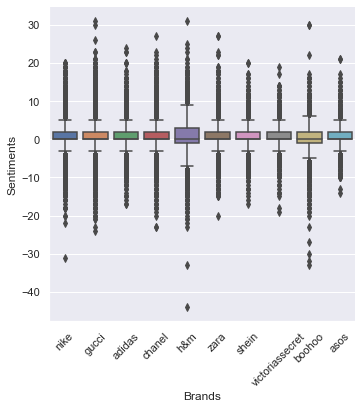

In [74]:
brands = []
brands = df_clean.select("brand").rdd.flatMap(lambda x: x).collect()

sent_df = pd.DataFrame({
        'Brands': brands,
        'Sentiments': df_sentiment
    })

ax2 = sns.catplot(x="Brands", y="Sentiments", kind="box", data=sent_df)
plt.xticks(rotation=45)
ax2

<AxesSubplot:xlabel='Brands', ylabel='Sentiments'>

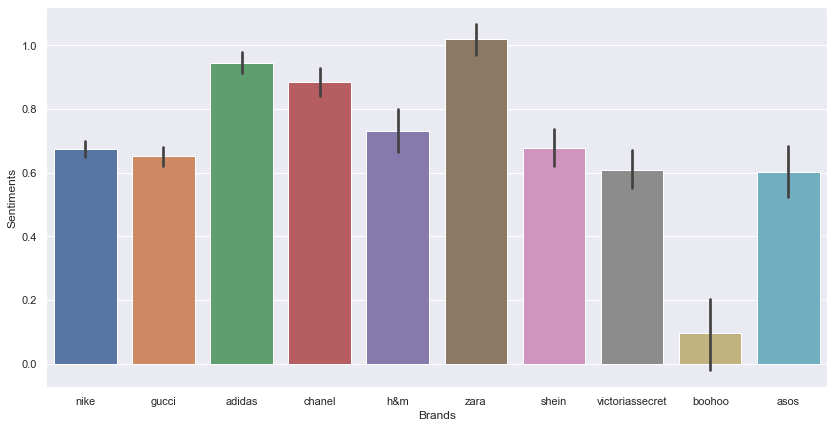

In [65]:
plt.figure(figsize = (14,7))
ax = sns.barplot(x="Brands", y="Sentiments", data=sent_df)
ax

In [71]:
sns.heatmap(sent_df)

ValueError: could not convert string to float: 'nike'